In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import sys 
import os
sys.path.append(os.path.abspath("../"))

In [2]:
from qrcode import QRCodeReader, BitMatrix

QR Code format error.


In [3]:
img = cv2.imread("D:\Data_QR\data\qr_1962.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

(3072, 3072, 3)


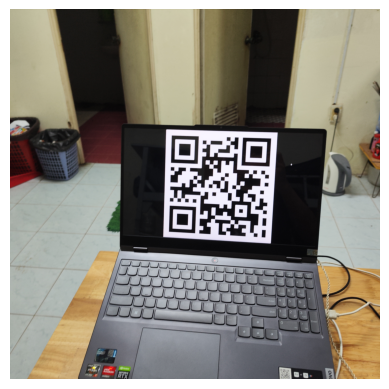

In [4]:
plt.imshow(img)
plt.axis("off")
plt.show()

In [5]:
import pathlib
from ultralytics import YOLO

# Định nghĩa đường dẫn đến mô hình và ảnh
model_path = "D:\\HK5\\CS406\\TestQR3\\exportmodel\\best2.pt"
# image_path = pathlib.Path("D:\\Data_QR\\data\\qr_2039.jpg")
image_path = pathlib.Path("D:\Data_QR\data\qr_1962.jpg")
# Tải mô hình
model = YOLO(model_path)

# Dự đoán trên ảnh với các tùy chọn bổ sung
result = model.predict(source=image_path , conf=0.6, save=True, device='cpu')



image 1/1 D:\Data_QR\data\qr_1962.jpg: 640x640 2 qrs, 133.9ms
Speed: 3.4ms preprocess, 133.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict94


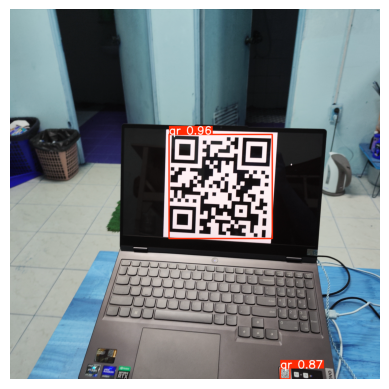

In [6]:
# Hiển thị ảnh (tùy chọn)
img_with_boxes = result[0].plot()
plt.imshow(img_with_boxes)
plt.axis('off')  # Ẩn trục
plt.show()  # Hiển thị ảnh

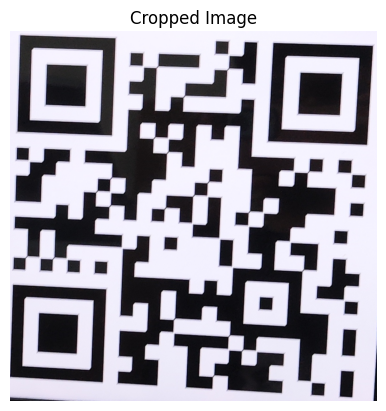

In [7]:
# Đọc ảnh gốc
image = cv2.imread(str(image_path))

# Khởi tạo biến image_crop
image_crop = image

# Lấy bounding box có độ tin cậy cao nhất
for idx, result in enumerate(result):
    if len(result.boxes) > 0:
        # Sắp xếp các box theo độ tin cậy từ cao đến thấp và lấy box đầu tiên
        best_box = sorted(result.boxes, key=lambda box: box.conf[0], reverse=True)[0]
        x_min, y_min, x_max, y_max = map(int, best_box.xyxy[0])  # Lấy tọa độ dạng int

        # Cắt ảnh trong bounding box
        image_crop = image[y_min:y_max, x_min:x_max]
        image_crop = cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB)
        # Hiển thị hình ảnh đã cắt
        plt.imshow(image_crop)  # Chuyển đổi màu BGR sang RGB
        plt.axis('off')  # Ẩn trục
        plt.title('Cropped Image')  # Tiêu đề cho hình ảnh
        plt.show()  # Hiển thị cửa sổ
    else:
        print(f"Image {idx + 1}: No bounding box detected.")

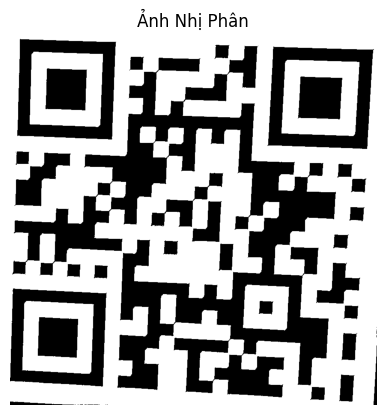

Image shape: (864, 857)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters

# Đọc ảnh đầu vào (giả sử bạn đã có biến image_crop)
# image_crop = io.imread('image_path')  # Nếu bạn muốn đọc ảnh từ đường dẫn

# Giả sử image_crop là ảnh bạn đã cắt
gray_image = cv2.cvtColor(image_crop.copy(), cv2.COLOR_RGB2GRAY)

# Áp dụng adaptive thresholding (ngưỡng cục bộ)
binary_image = cv2.adaptiveThreshold(gray_image, 
                                    255,  # Giá trị tối đa (trắng)
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # Phương pháp tính ngưỡng
                                    cv2.THRESH_BINARY,  # Thực hiện thresholding nhị phân
                                    151,  # Kích thước cửa sổ (block size)
                                    2)  # Hệ số trừ đi từ giá trị trung bình

# Hiển thị ảnh nhị phân
plt.imshow(binary_image, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.title('Ảnh Nhị Phân')
plt.show()

# Hiển thị kích thước của ảnh gốc
print(f"Image shape: {binary_image.shape}")


# CREATE BITMATRIX

# GRAY SCALE

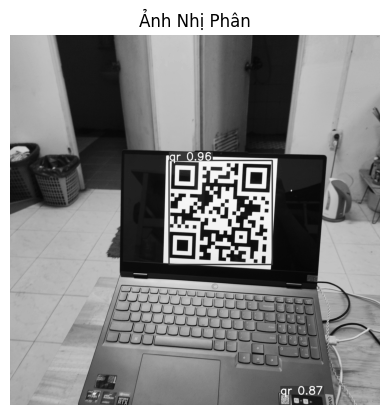

In [9]:
from common import CV2ImageLuminanceSource
source = CV2ImageLuminanceSource(image_crop)
plt.imshow(source.image, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.title('Ảnh Nhị Phân')
plt.show()

In [10]:
print(source.image.shape)

(3072, 3072)


In [11]:
from common import HybridBinarizer
binarizer = HybridBinarizer(source)

In [12]:
from qrcode import BinaryBitmap
bitmap = BinaryBitmap(binarizer)

# CREATE QR CODE READER

Detect


d:\HK5\CS406\QR_Decoder\common\HybridBinarizer.py:157: RuntimeWarning: overflow encountered in scalar add
  sum_pixels += pixel


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
1
0


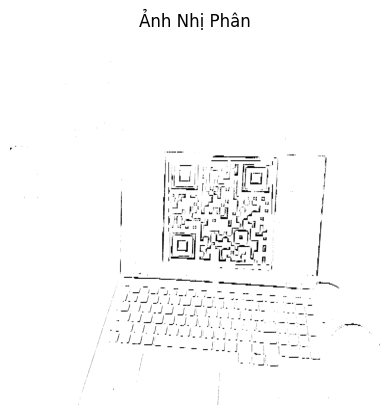

In [13]:
reader = QRCodeReader()
res = reader.decode(bitmap)
print(res.bits)
print(np.max(res.bits))
print(np.min(res.bits))
# Hiển thị ảnh nhị phân
plt.imshow(res.bits, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.title('Ảnh Nhị Phân')
plt.show()